In [5]:
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for basic plotting
import seaborn as sns # for enhanced data visualization
from faker import Faker # for synthetic data generation
import random # For random number generation

In [7]:
# Load the dataset
file_path = 'Online Retail.xlsx' # make sure to update the path according to your system

try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

# Print the column names to identify features
if 'df' in locals():
  print("\nColumns in the dataset:")
  print(df.columns)


# Display the first 5 rows of the dataset to get a glimpse of the data
if 'df' in locals():
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

Data loaded successfully.

Columns in the dataset:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       

In [9]:
if 'df' in locals(): # checking if the df variable exists
  # Check for missing values in each column
  missing_values = df.isnull().sum()

  # Calculate the percentage of missing values
  missing_percentage = (missing_values / len(df)) * 100

  # Create a DataFrame to display the results
  missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

  # Filter out columns without missing values
  missing_data = missing_data[missing_data['Missing Values'] > 0]
  #Print the missing values and their percentages
  print("\nMissing values in the dataset (with their percentages):")
  print(missing_data.sort_values(by='Missing Percentage', ascending=False))
else:
  print("Error: DataFrame not loaded. Please ensure the data has been loaded in the previous steps")


Missing values in the dataset (with their percentages):
             Missing Values  Missing Percentage
CustomerID           135080           24.926694
Description            1454            0.268311


In [11]:
if 'df' in locals(): # checking if the df variable exists
  # Remove rows where CustomerID is missing
  df.dropna(subset=['CustomerID'], inplace=True)
  print("Rows with missing CustomerID removed.")

  # Remove rows where Description is missing
  df.dropna(subset=['Description'], inplace=True)
  print("Rows with missing Description removed.")

  # Convert CustomerID to integer (as it is a float)
  df['CustomerID'] = df['CustomerID'].astype(int)
  print("CustomerID column converted to integer")

  # Verify that the missing values are resolved.
  missing_values = df.isnull().sum()

  missing_percentage = (missing_values / len(df)) * 100

  missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
  missing_data = missing_data[missing_data['Missing Values'] > 0]

  if not missing_data.empty:
     print("Missing Values: ")
     print(missing_data)
  else:
     print("No more missing values after removal!")
else:
    print("Error: DataFrame not loaded. Please ensure the data has been loaded in the previous steps")

Rows with missing CustomerID removed.
Rows with missing Description removed.
CustomerID column converted to integer
No more missing values after removal!


In [13]:
if 'df' in locals():
    # Initialize Faker
    fake = Faker()

    # Generate synthetic demographic data
    customer_demographics = {customer_id: {'age': random.randint(18, 70), 'gender': random.choice(['Male', 'Female']), 'location': fake.country()}
                              for customer_id in df['CustomerID'].unique()}
    # Create a DataFrame from the demographic data
    demographics_df = pd.DataFrame.from_dict(customer_demographics, orient='index')
    demographics_df.index.name = 'CustomerID'
    demographics_df.reset_index(inplace=True)

    # Merge synthetic demographic data with the transaction data
    df = df.merge(demographics_df, on='CustomerID', how='left')

    print("Synthetic demographics generated and merged.")

    # Display the first few rows with synthetic data
    print("\nFirst 5 rows with synthetic data:")
    print(df.head())

    # Verify the demographic data types
    print("\nData types after merge:")
    print(df.dtypes)

else:
    print("Error: DataFrame not loaded. Please ensure the data has been loaded in the previous steps")

Synthetic demographics generated and merged.

First 5 rows with synthetic data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  age gender  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom   20   Male   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom   20   Male   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom   20   Male   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom   20   Male   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom   20   Male   

   location  
0  Malaysia  
1 

In [15]:
if 'df' in locals():
    # Define Product Categories
    categories = ['Electronics','Clothing', 'Home Goods', 'Toys', 'Books', 'Other']

    #Function to randomly assign a category
    def assign_category(description):
      return random.choice(categories)

    # Apply the function to create a new 'Product Category' column
    df['Product Category'] = df['Description'].apply(assign_category)

    print("Product categories generated and added.")

    # Display the first few rows with product category
    print("\nFirst 5 rows with product categories:")
    print(df.head())

    # Verify the datatypes
    print("\nData types after product categories:")
    print(df.dtypes)
else:
    print("Error: DataFrame not loaded. Please ensure the data has been loaded in the previous steps")

Product categories generated and added.

First 5 rows with product categories:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  age gender  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom   20   Male   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom   20   Male   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom   20   Male   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom   20   Male   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom   20   Male   

   location Product Category  


Daily sales data calculated and set as time series.


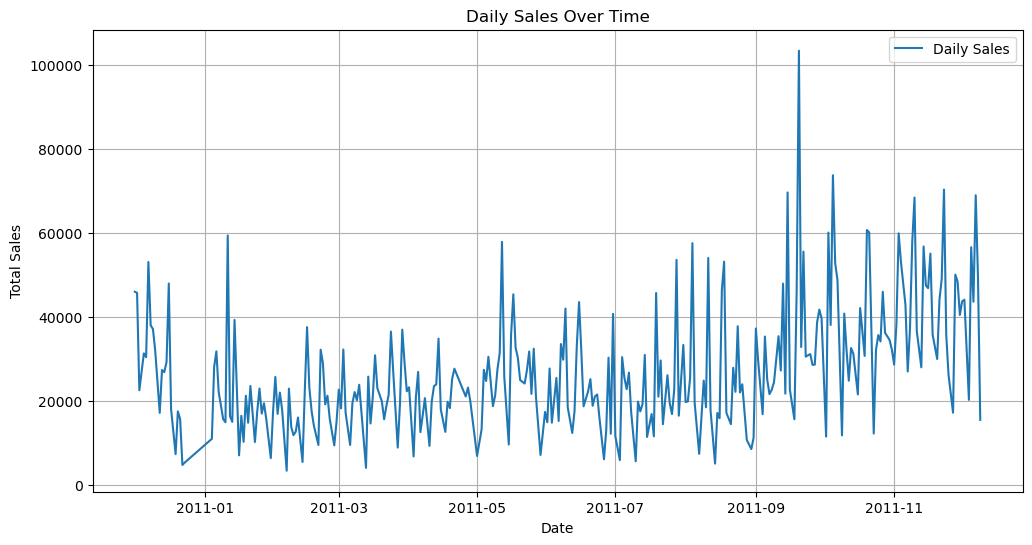

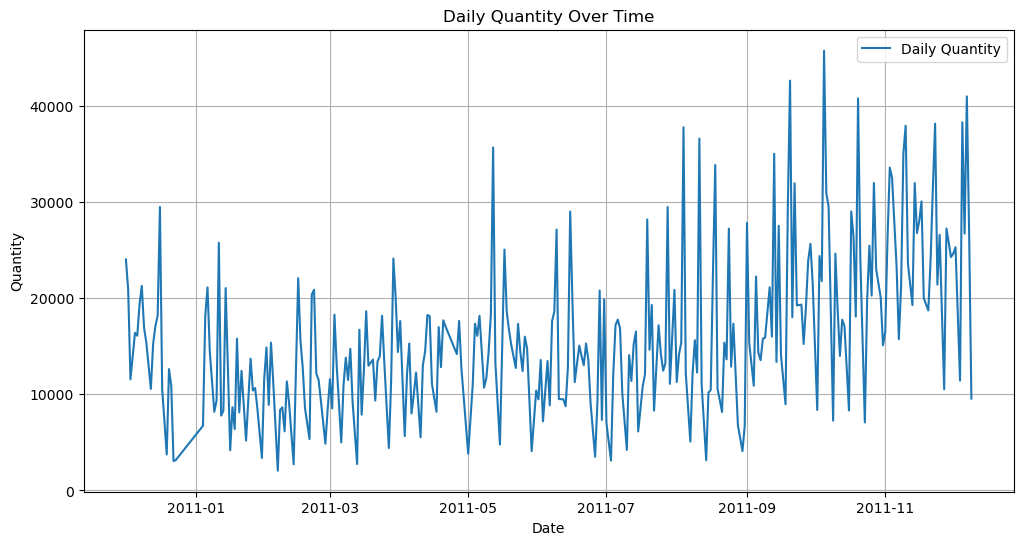

In [17]:
if 'df' in locals():
    # Convert 'InvoiceDate' to just date (ignoring time)
    df['InvoiceDate'] = df['InvoiceDate'].dt.date

    # Calculate total sales per transaction
    df['TotalSales'] = df['Quantity'] * df['UnitPrice']

    # Group by 'InvoiceDate' and calculate daily sales
    daily_sales = df.groupby('InvoiceDate').agg({'TotalSales':'sum', 'Quantity':'sum'}).reset_index()

    # Convert 'InvoiceDate' to datetime and set as index
    daily_sales['InvoiceDate'] = pd.to_datetime(daily_sales['InvoiceDate'])
    daily_sales = daily_sales.set_index('InvoiceDate')

    print("Daily sales data calculated and set as time series.")

    # Plot the sales data
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['TotalSales'], label = 'Daily Sales')
    plt.title('Daily Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['Quantity'], label='Daily Quantity')
    plt.title('Daily Quantity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: DataFrame not loaded. Please ensure the data has been loaded in the previous steps")

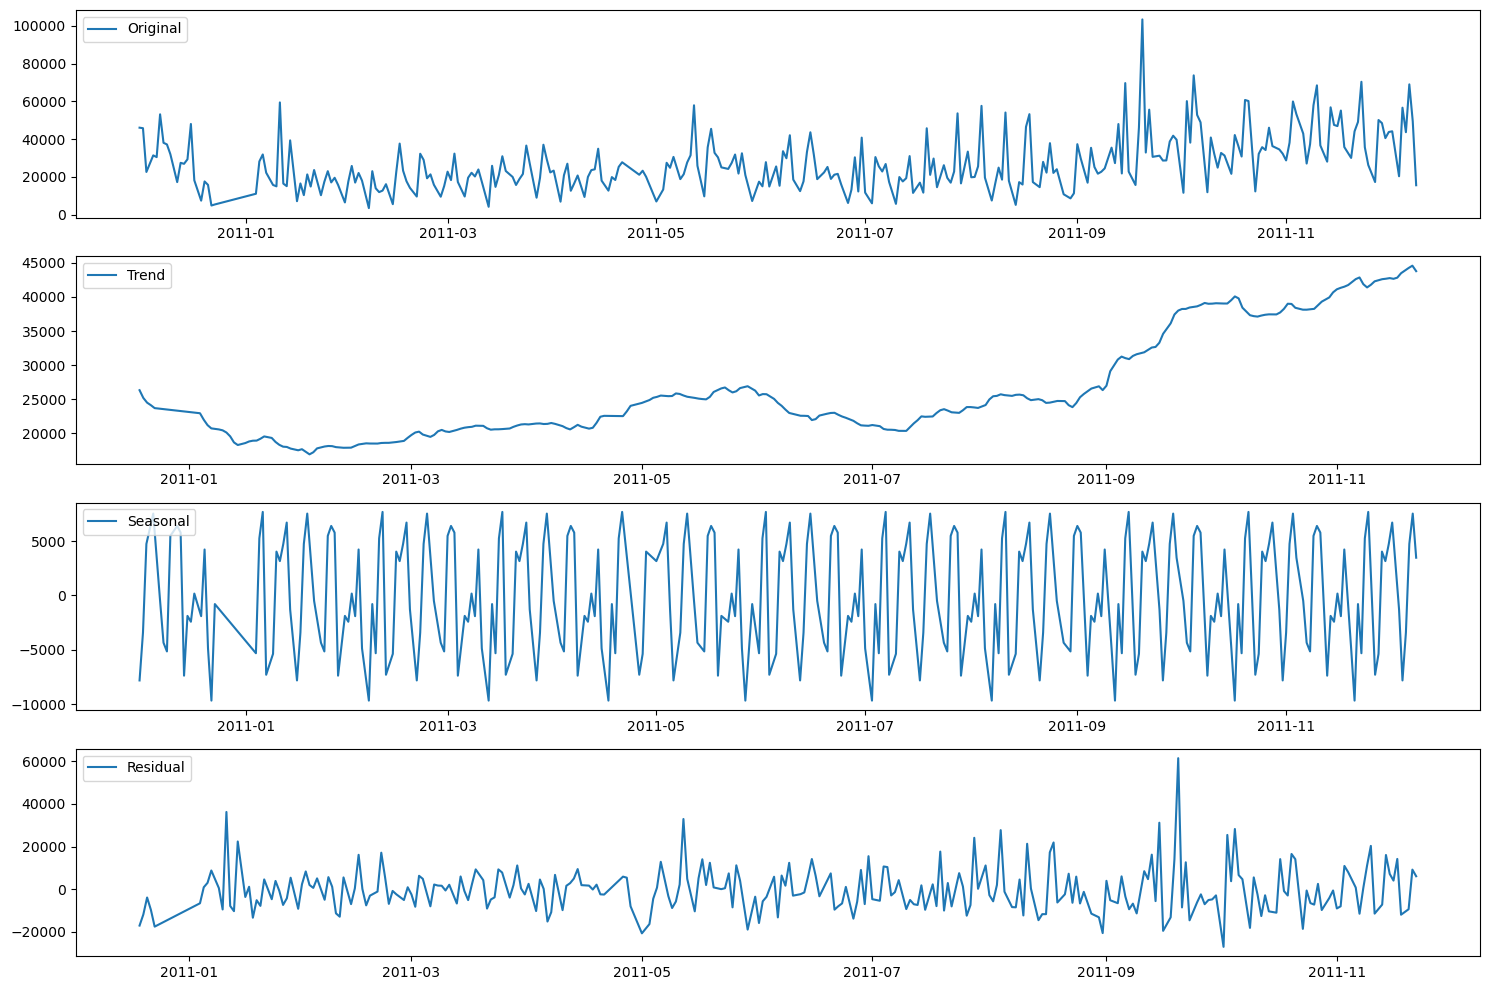

In [19]:
if 'daily_sales' in locals():
    from statsmodels.tsa.seasonal import seasonal_decompose

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(daily_sales['TotalSales'], model='additive', period = 30)  #period to approximately one month

    # Extract decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the decomposed components
    plt.figure(figsize=(15, 10))
    plt.subplot(411)
    plt.plot(daily_sales['TotalSales'], label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Error: daily sales DataFrame not available. Please ensure the previous steps have been completed.")

In [21]:
if 'daily_sales' in locals():
    from sklearn.model_selection import train_test_split
    import numpy as np

    # Split the data into training and testing sets (80% train, 20% test)
    train_size = int(len(daily_sales) * 0.8)
    train_data = daily_sales.iloc[:train_size]
    test_data = daily_sales.iloc[train_size:]

    print("Data split into training and testing sets")

    # Feature Engineering - create lagged features
    def create_lagged_features(data, lag=7):  # 7 day lag for now
        data_copy = data.copy()
        for i in range(1, lag+1):
           data_copy[f'lag_{i}'] = data_copy['TotalSales'].shift(i)
        data_copy.dropna(inplace = True)
        return data_copy

    train_data_lagged = create_lagged_features(train_data)
    test_data_lagged = create_lagged_features(test_data)
    print("Lagged features created.")

    # Separate features and target variable (TotalSales)
    X_train = train_data_lagged.drop('TotalSales', axis=1)
    y_train = train_data_lagged['TotalSales']
    X_test = test_data_lagged.drop('TotalSales', axis=1)
    y_test = test_data_lagged['TotalSales']
    print ("Features separated and test/train sets ready")


    print ("\n Training features: ")
    print(X_train.head())
    print("\n Training targets:")
    print(y_train.head())

else:
    print("Error: daily sales DataFrame not available. Please ensure the previous steps have been completed.")

Data split into training and testing sets
Lagged features created.
Features separated and test/train sets ready

 Training features: 
             Quantity     lag_1     lag_2     lag_3     lag_4     lag_5  \
InvoiceDate                                                               
2010-12-09      16904  38048.68  53125.99  30465.08  31380.60  22598.46   
2010-12-10      15388  37177.85  38048.68  53125.99  30465.08  31380.60   
2010-12-12      10561  32005.35  37177.85  38048.68  53125.99  30465.08   
2010-12-13      15234  17217.62  32005.35  37177.85  38048.68  53125.99   
2010-12-14      17108  27429.43  17217.62  32005.35  37177.85  38048.68   

                lag_6     lag_7  
InvoiceDate                      
2010-12-09   45775.43  46051.26  
2010-12-10   22598.46  45775.43  
2010-12-12   31380.60  22598.46  
2010-12-13   30465.08  31380.60  
2010-12-14   53125.99  30465.08  

 Training targets:
InvoiceDate
2010-12-09    37177.85
2010-12-10    32005.35
2010-12-12    17217.62
2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

ARIMA model trained successfully
Predictions generated.
Root Mean Squared Error (RMSE): 15062.244104902233


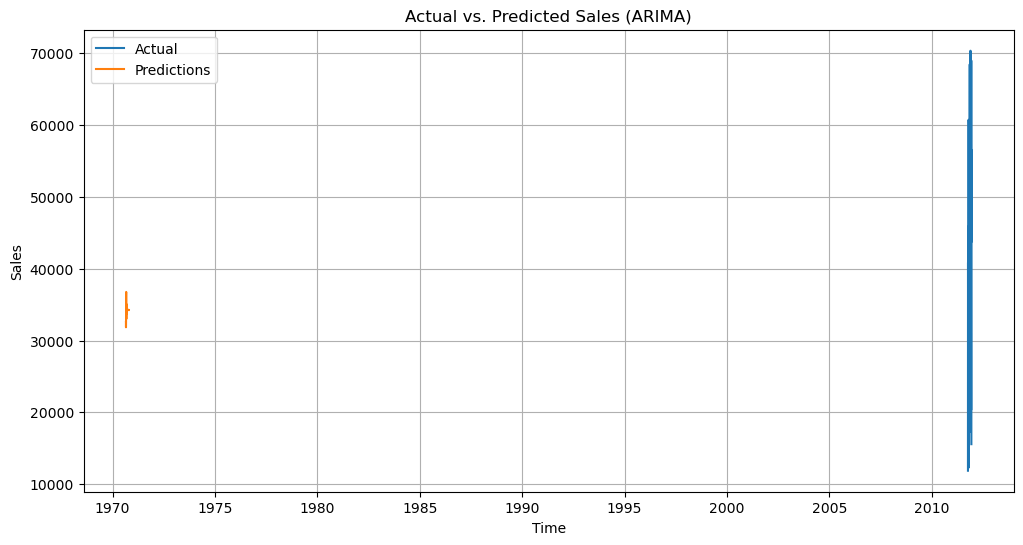

In [23]:
if 'X_train' in locals() and 'y_train' in locals() and 'X_test' in locals() and 'y_test' in locals():
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    import numpy as np

    # Train the ARIMA model
    try:
       model = ARIMA(y_train, order=(5, 1, 0))  # Experiment with p, d, q values for best fit
       model_fit = model.fit()
       print("ARIMA model trained successfully")

       # Make predictions on the test data
       predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
       print("Predictions generated.")


       # Calculate the RMSE
       rmse = np.sqrt(mean_squared_error(y_test, predictions))
       print(f'Root Mean Squared Error (RMSE): {rmse}')

        # Plotting the results
       plt.figure(figsize=(12,6))
       plt.plot(y_test, label='Actual')
       plt.plot(predictions, label='Predictions')
       plt.xlabel('Time')
       plt.ylabel('Sales')
       plt.title('Actual vs. Predicted Sales (ARIMA)')
       plt.legend()
       plt.grid(True)
       plt.show()

    except Exception as e:
       print(f"An error occurred while training or testing the model: {e}")
else:
    print("Error: Training or testing data is not loaded, Please check previous steps.")

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model trained successfully
Predictions generated.
Root Mean Squared Error (RMSE): 15473.823891574475


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


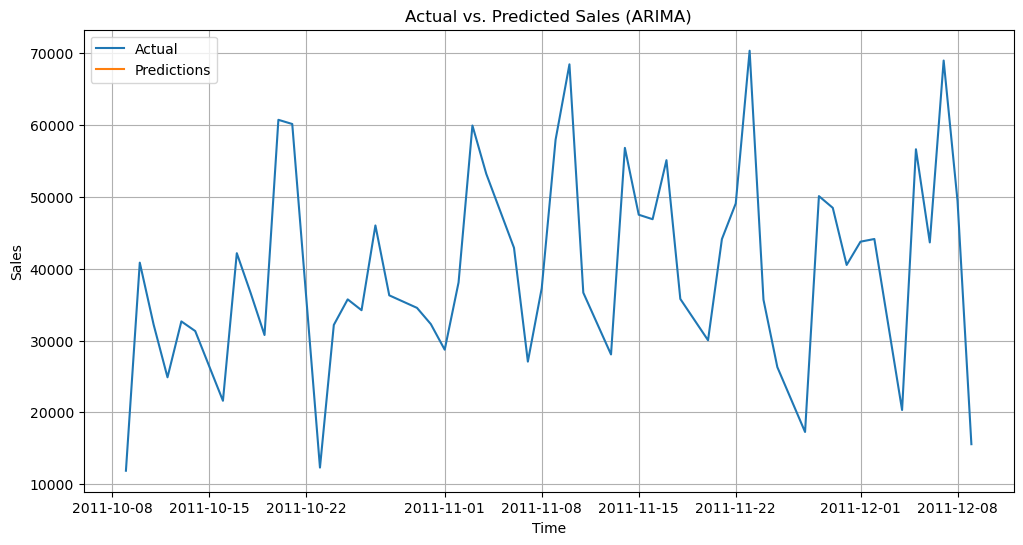

In [25]:
if 'X_train' in locals() and 'y_train' in locals() and 'X_test' in locals() and 'y_test' in locals():
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    import numpy as np

    # Train the ARIMA model
    try:
       model = ARIMA(y_train, order=(7, 1, 2))  # Experiment with p, d, q values for best fit
       model_fit = model.fit()
       print("ARIMA model trained successfully")

       # Make predictions on the test data
       predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)
       print("Predictions generated.")

       # Calculate the RMSE
       rmse = np.sqrt(mean_squared_error(y_test, predictions))
       print(f'Root Mean Squared Error (RMSE): {rmse}')


       # Plotting the results
       plt.figure(figsize=(12,6))
       plt.plot(y_test.index, y_test, label='Actual')
       predictions = pd.Series(predictions, index=y_test.index)
       plt.plot(predictions.index, predictions, label='Predictions')
       plt.xlabel('Time')
       plt.ylabel('Sales')
       plt.title('Actual vs. Predicted Sales (ARIMA)')
       plt.legend()
       plt.grid(True)
       plt.show()


    except Exception as e:
       print(f"An error occurred while training or testing the model: {e}")
else:
    print("Error: Training or testing data is not loaded, Please check previous steps.")

In [27]:
if 'df' in locals():
    # Aggregate data to customer level to generate RFM (Recency, Frequency, Monetary) features
    today = df['InvoiceDate'].max()
    rfm_df = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (today - x.max()).days,
        'InvoiceNo': lambda x: len(x),
        'TotalSales': lambda x: x.sum()
    })
    rfm_df.rename(columns={'InvoiceDate': 'Recency',
                           'InvoiceNo': 'Frequency',
                           'TotalSales': 'Monetary'}, inplace=True)

    print ("RFM features generated for each customer.")
    print (rfm_df.head())

    from sklearn.preprocessing import StandardScaler
    # Standardize the features for clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm_df)
    rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns = rfm_df.columns)
    print("RFM features scaled.")
    print(rfm_scaled.head())
else:
    print ("Dataframe not loaded. Please ensure the previous steps have been executed correctly")

RFM features generated for each customer.
            Recency  Frequency  Monetary
CustomerID                              
12346           325          2      0.00
12347             2        182   4310.00
12348            75         31   1797.24
12349            18         73   1757.55
12350           310         17    334.40
RFM features scaled.
             Recency  Frequency  Monetary
CustomerID                               
12346       2.316568  -0.391720 -0.231001
12347      -0.889050   0.382657  0.293432
12348      -0.164560  -0.266959 -0.012316
12349      -0.730258  -0.086271 -0.017146
12350       2.167700  -0.327188 -0.190312


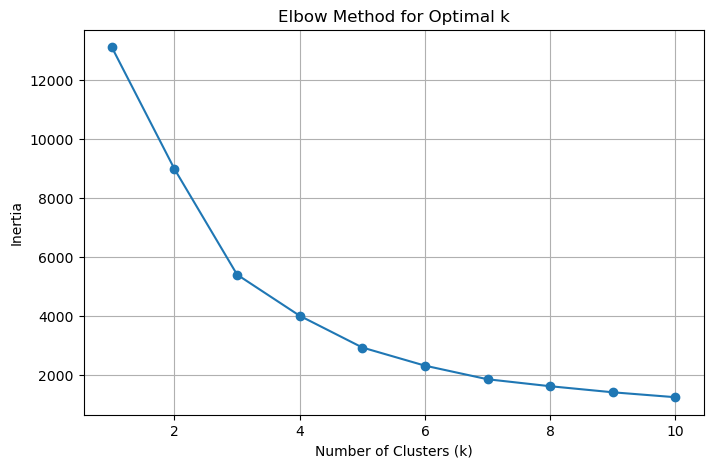

K-means clustering performed and cluster labels added to dataframe.
            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346           325          2      0.00        0
12347             2        182   4310.00        1
12348            75         31   1797.24        1
12349            18         73   1757.55        1
12350           310         17    334.40        0

Cluster characteristics: 
            Recency    Frequency       Monetary      
               mean         mean           mean count
Cluster                                              
0        246.390909    27.738182     463.590610  1100
1         39.665951   104.960123    1952.625725  3260
2          4.333333  2845.583333  118713.023333    12


In [29]:
if 'rfm_scaled' in locals():
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    # Determine optimal number of clusters (k) using the elbow method
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(rfm_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the elbow method graph
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    #Apply k means with k = 3
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)

    # Assign cluster labels to original data
    rfm_df['Cluster'] = kmeans.labels_
    print ("K-means clustering performed and cluster labels added to dataframe.")
    print (rfm_df.head())


    # Analyze cluster characteristics
    print ("\nCluster characteristics: ")
    print(rfm_df.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }))


else:
  print ("Error: RFM data not generated. Please ensure the previous steps have been executed.")

In [31]:
if 'df' in locals():
    # Create the user-item matrix
    user_item_matrix = df.pivot_table(index='CustomerID', columns='Description', values='Quantity', fill_value=0)
    print ("User item matrix generated.")
    print (user_item_matrix.head())


else:
    print ("Error: dataframe is not loaded. Please make sure the previous steps are performed")

User item matrix generated.
Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
CustomerID                                                                    
12346                                   0.0                             0.0   
12347                                   0.0                             0.0   
12348                                   0.0                             0.0   
12349                                   0.0                             0.0   
12350                                   0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
CustomerID                                                      
12346                       0.0                           0.0   
12347                       0.0                           0.0   
12348                       0.0                           0.0   
12349                       0.0                           0.0   
12350                       

In [33]:
if 'user_item_matrix' in locals():
    from sklearn.metrics.pairwise import cosine_similarity
    import pandas as pd
    import numpy as np

    # Calculate cosine similarity between items
    item_similarity = cosine_similarity(user_item_matrix.T)
    item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns = user_item_matrix.columns)

    print("Item similarity matrix generated.")

    def recommend_items(user_id, num_recommendations=5):
        if user_id not in user_item_matrix.index:
          return "User not in dataset, please choose a different user"

        # Find items that user has purchased
        purchased_items = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index

        # Get similarity scores
        scores = item_similarity_df.loc[purchased_items].sum(axis = 0)
        # Exclude already purchased items and sort
        scores = scores.drop(purchased_items)
        top_items = scores.sort_values(ascending=False).head(num_recommendations)
        return top_items

    print("Recommendation function created.")
    #Make recommendations
    user_id = 12350
    recommendations = recommend_items(user_id)
    print (f"\nTop recommendations for user {user_id}:")
    print (recommendations)


else:
    print ("Error: User Item Matrix not created, please ensure the previous steps have been executed")

Item similarity matrix generated.
Recommendation function created.

Top recommendations for user 12350:
Description
PICNIC BOXES SET OF 3 RETROSPOT     3.614173
3 TIER CAKE TIN RED AND CREAM       3.290731
PACK OF 20 NAPKINS RED APPLES       3.172464
GLASS JAR MARMALADE                 3.141056
PLASTERS IN TIN STRONGMAN           3.128424
dtype: float64


In [35]:
import pickle
import joblib

# To save
with open('arima_model.pkl', 'wb') as f:
   pickle.dump(model_fit, f)

with open('kmeans_model.pkl', 'wb') as f:
  pickle.dump(kmeans, f)

with open('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

joblib.dump(item_similarity_df, 'item_similarity.joblib')


# To load
with open('arima_model.pkl', 'rb') as f:
   loaded_model = pickle.load(f)

with open('kmeans_model.pkl', 'rb') as f:
    loaded_kmeans = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)


loaded_item_similarity_df = joblib.load('item_similarity.joblib')